<a href="https://colab.research.google.com/github/azario0/analyse-kaggle/blob/main/english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link to the dataset
https://www.kaggle.com/datasets/ashutosh598/shoes-price-for-various-brands

# Data Analysis and Visualization of 'data.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [ ]:
df = pd.read_csv('data.csv')

### Inspecting the Data

In [ ]:
print(df.head())

      brand  color size  price  offer_price
0  Tresmode  Black  6.5   4647         4153
1     Lavie   Gold    4   2446         1172
2      FILA    Red    6   2346         1898
3     Crocs    Red    5   5942         5868
4     Crocs   Blue    4   2942         2118


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        5679 non-null   object
 1   color        5679 non-null   object
 2   size         5679 non-null   object
 3   price        5679 non-null   int64 
 4   offer_price  5679 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 222.0+ KB
None


In [ ]:
print(df.describe())

              price   offer_price
count   5679.000000   5679.000000
mean    4945.126255   4007.745026
std     5344.881308   4761.543884
min     1346.000000    773.000000
25%     2942.000000   1968.000000
50%     3742.000000   2868.000000
75%     4646.000000   4048.000000
max    37947.000000  34123.000000


## Descriptive Statistics and Visualization

### Distribution of Prices

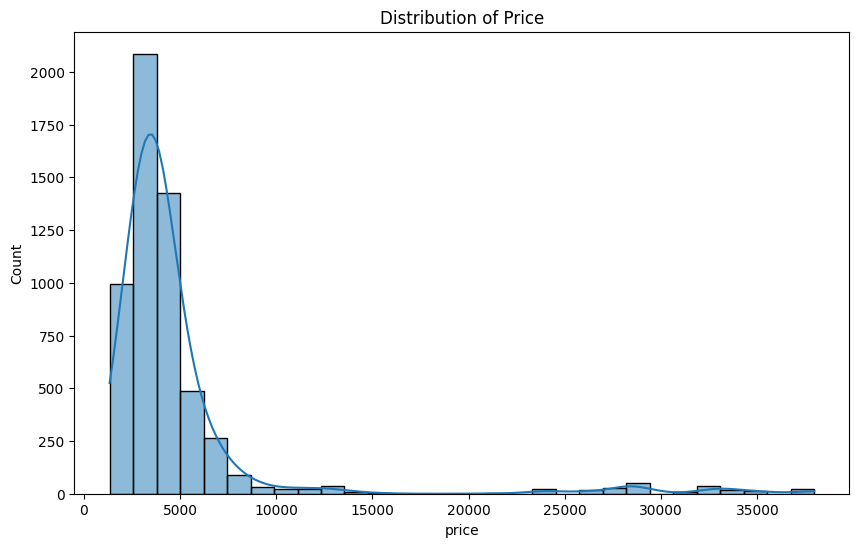

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()

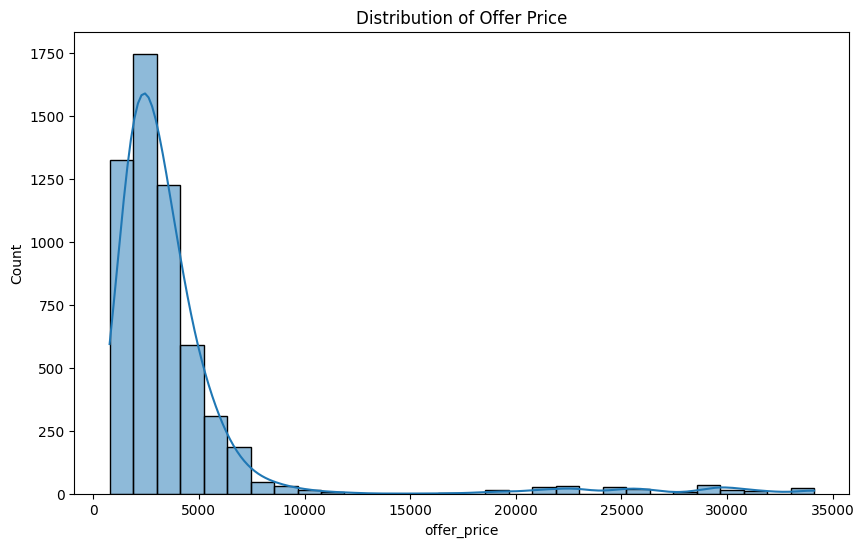

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['offer_price'], bins=30, kde=True)
plt.title('Distribution of Offer Price')
plt.show()

### Relationship between Price and Offer Price

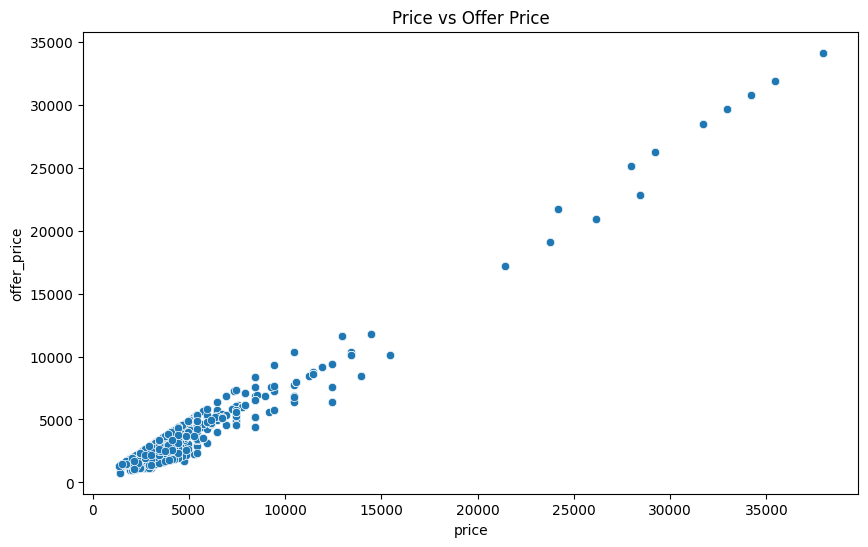

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='offer_price', data=df)
plt.title('Price vs Offer Price')
plt.show()

## Categorical Variable Analysis

### Brand Analysis

In [ ]:
print(df['brand'].nunique())

30


In [ ]:
brand_counts = df['brand'].value_counts()
print(brand_counts.head(10))

brand
Crocs           1808
Franco Leone     630
Tresmode         618
Nike             236
Tory Burch       214
FILA             187
Woodland         176
LaBriza          168
Buckaroo         148
Reebok           139
Name: count, dtype: int64


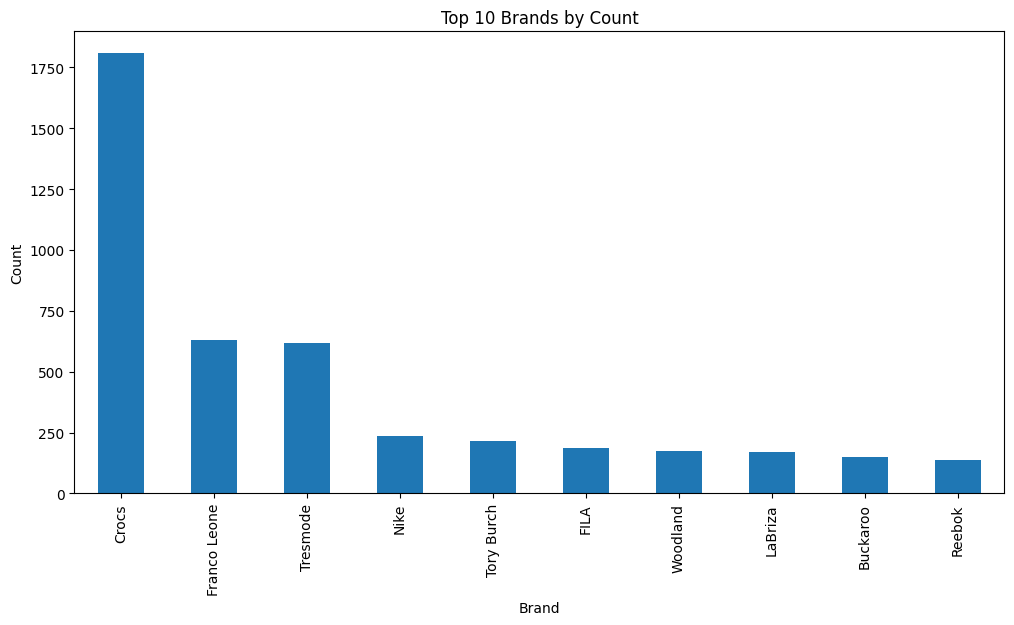

In [ ]:
plt.figure(figsize=(12,6))
brand_counts.head(10).plot(kind='bar')
plt.title('Top 10 Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

### Color Analysis

In [ ]:
color_counts = df['color'].value_counts()
print(color_counts.head(10))

color
Black    1386
Brown     745
Blue      688
Grey      320
Tan       316
White     263
Red       210
Pink      195
Gold      150
Beige     133
Name: count, dtype: int64


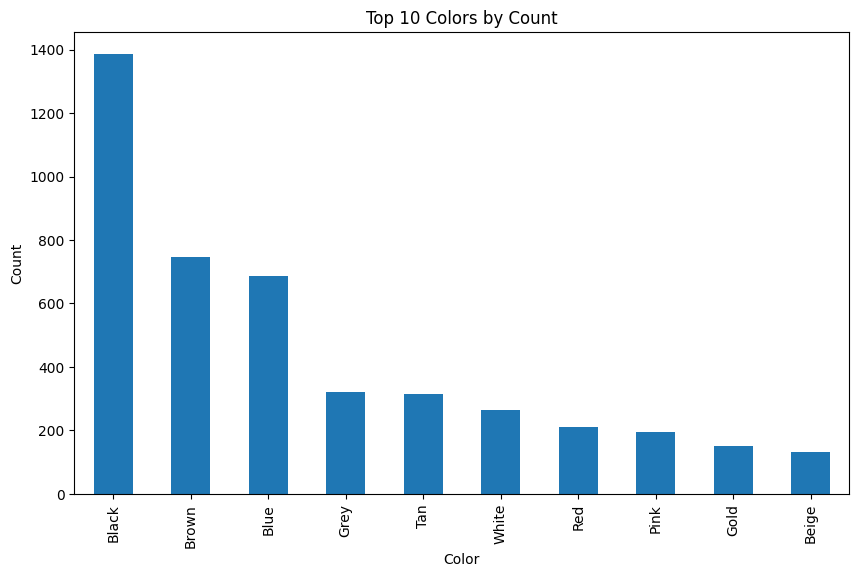

In [ ]:
plt.figure(figsize=(10,6))
color_counts.head(10).plot(kind='bar')
plt.title('Top 10 Colors by Count')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

### Average Price per Brand

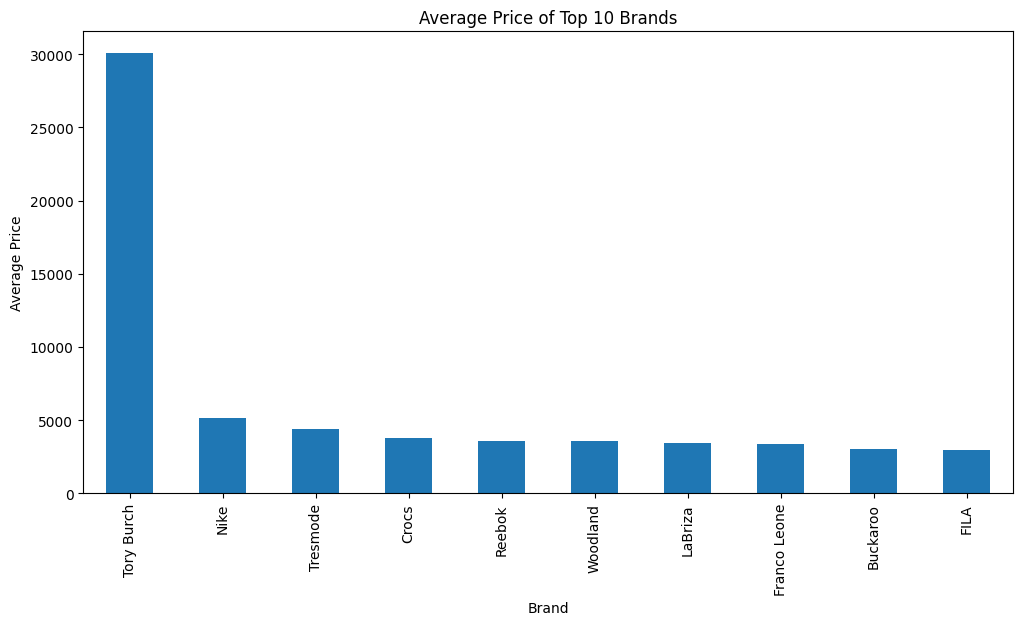

In [ ]:
top_brands = brand_counts.head(10).index
df_top_brands = df[df['brand'].isin(top_brands)]
plt.figure(figsize=(12,6))
df_top_brands.groupby('brand')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Price of Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

## Discount Analysis

In [ ]:
df['discount_amount'] = df['price'] - df['offer_price']
df['discount_percentage'] = (df['discount_amount'] / df['price']) * 100

### Distribution of Discount Percentage

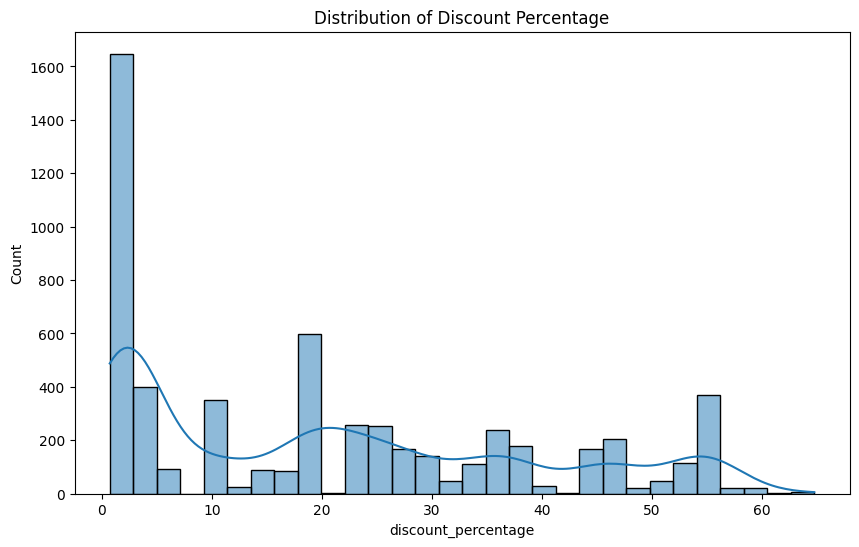

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['discount_percentage'], bins=30, kde=True)
plt.title('Distribution of Discount Percentage')
plt.show()

## Correlation Analysis

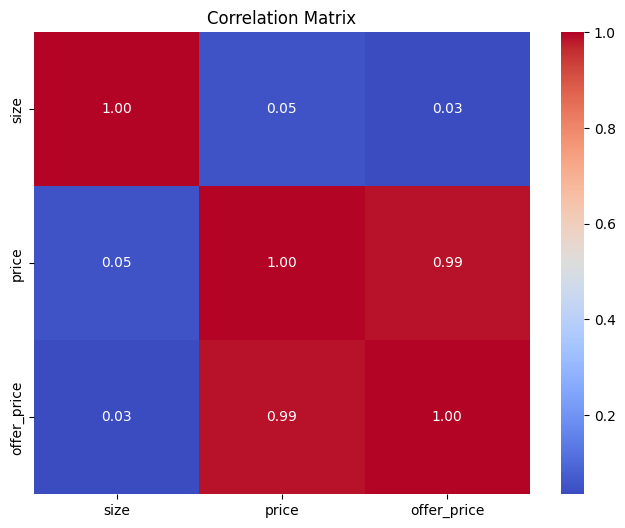

In [ ]:
df["size"] = pd.to_numeric(df["size"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["offer_price"] = pd.to_numeric(df["offer_price"], errors="coerce")

cleaned_df = df.dropna()

numerical_df = cleaned_df[["size", "price", "offer_price"]]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()